# Letsgrowmore-VIP (virtual intership program)
# DATA ANALYTICS

# Author: RAMIJ RAJA

# TASK: 1
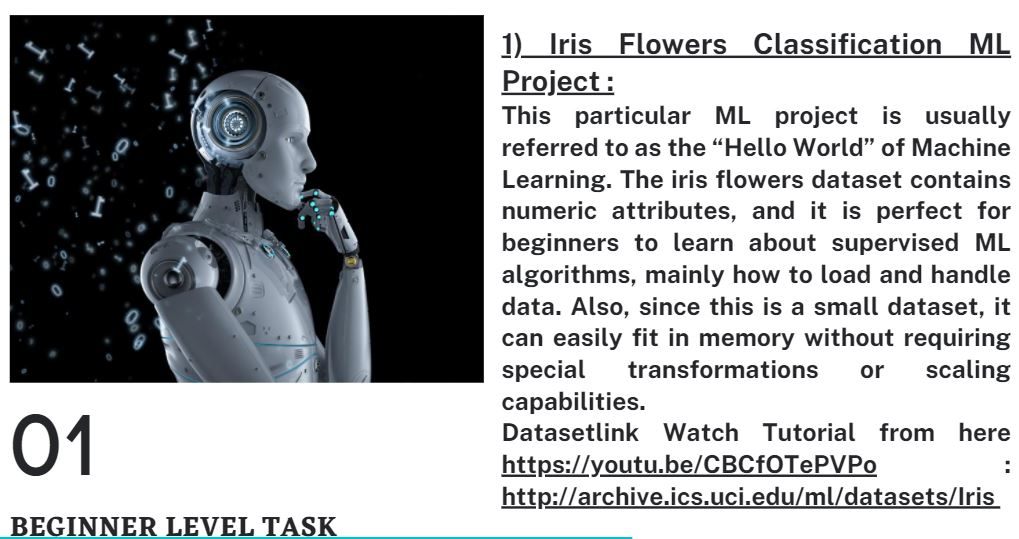

In [58]:
#importing the required header 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#importing thre dataset 
data=sns.load_dataset('iris')

In [60]:
#checking is there any null value present or not 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [61]:
#checking the correlation between the column 
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

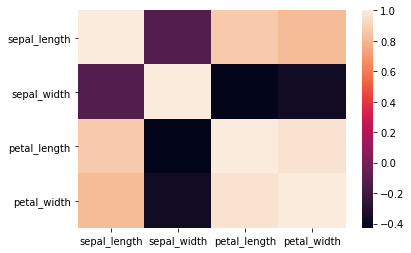

In [62]:
#Vizualization of the columns accroding to their  relation
sns.heatmap(data.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


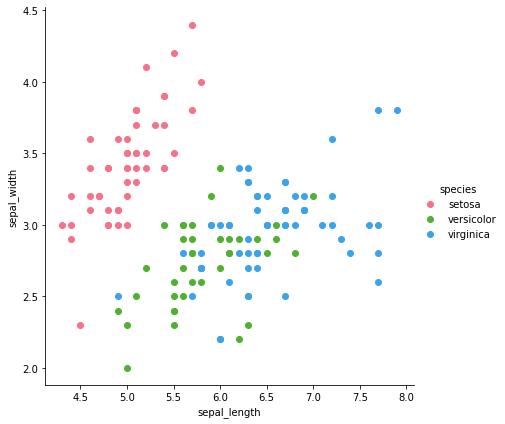

In [63]:
sns.FacetGrid(data,hue='species',palette='husl',size=6)\
    .map(plt.scatter,"sepal_length","sepal_width")\
    .add_legend()

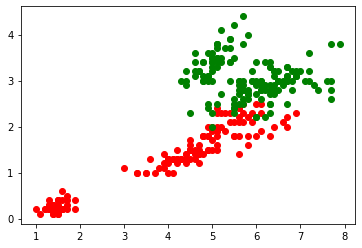

In [64]:
plt.scatter(data["petal_length"],data["petal_width"],color='r')
plt.scatter(data["sepal_length"],data["sepal_width"],color='g')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


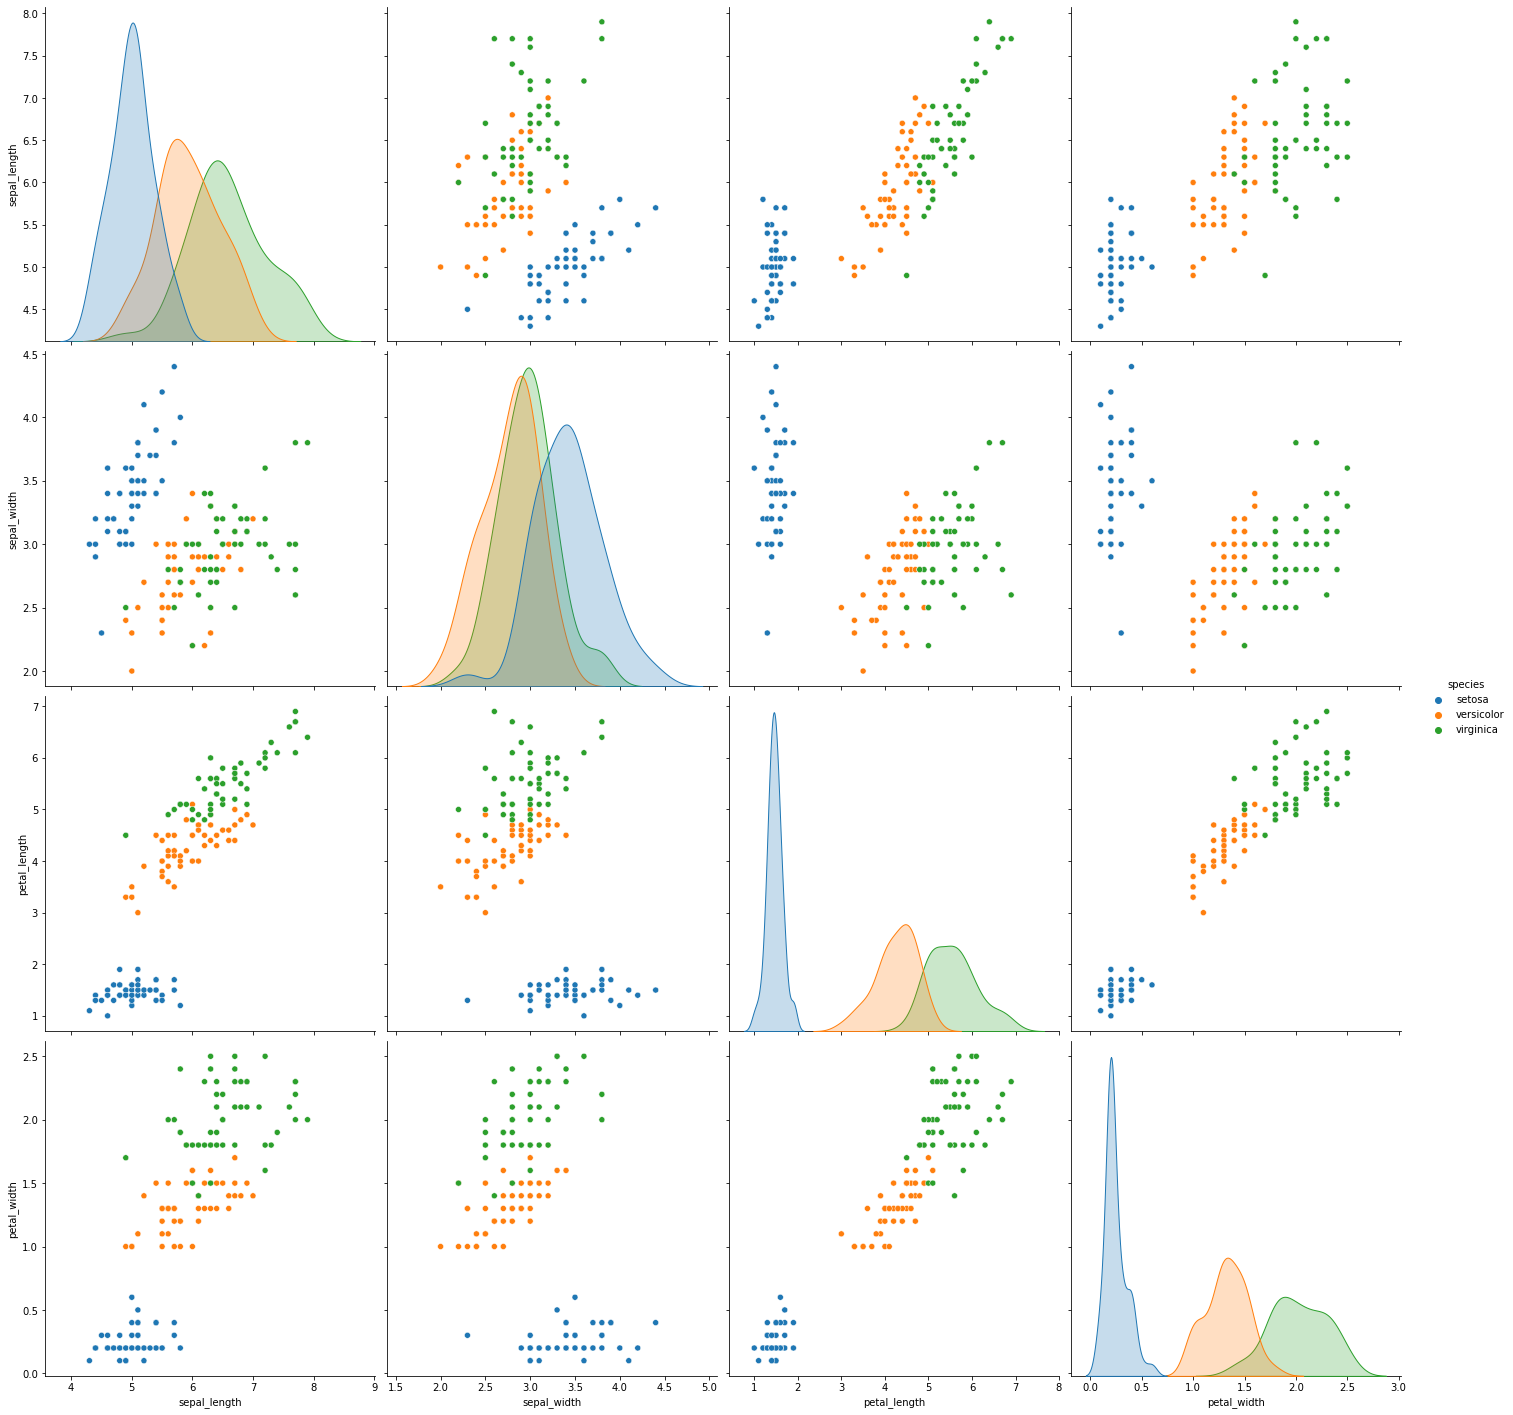

In [65]:
sns.pairplot(data,hue="species",size=5)

In [67]:
#importing confusion matrix for getting confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
#divide our data into predictors (X) and target values (y)
X = data.copy()
y = X.pop('species')

In [69]:
#Splitting the data in test and train where test size is 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [70]:
#performing the scalling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)
# Output = 0.9666666666666667
y_pred = model.predict(X_test)
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.97



# SVC-RBF

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
Y_pred = classifier.predict(X_test)
scores = cross_val_score(model, X_train, y_train, cv=10)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.97



# SVN-Linear

In [73]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Accuracy: 0.97



# SVC -Sigmoid

In [74]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]

Accuracy: 0.90



# KNN

In [75]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Accuracy: 0.97



# RandomForestClassifier

In [80]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Accuracy: 0.97

